In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("dataset/ai_gen_data.csv")

In [3]:
df

,salary,experience,Job
0,300.000000,1.000000,Junior
1,15.650986,2.071429,Junior
2,15.650986,2.071429,Junior
3,330.000000,4.000000,Junior
4,700.000000,2.071429,Junior
...,...,...,...
144,24.844444,2.730769,Project Manager
145,500.000000,1.000000,Project Manager
146,450.000000,2.000000,Project Manager
147,24.844444,2.000000,Project Manager


In [4]:
df["Job"] = df["Job"].map({'Junior':1,'Senior':2,"Chief Technology Officer":3,"Project Manager":4})

In [10]:
X = df[['Job','experience']]
y = df["salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train = np.array(X_train).reshape(len(X_train),2)
y_train = np.array(y_train).reshape(len(y_train),1)

X_test = np.array(X_test).reshape(len(X_test),2)
y_test = np.array(y_test).reshape(len(y_test),1)

In [12]:
from sklearn import linear_model

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
model.intercept_

array([194.11626812])

In [15]:
model.coef_

array([[31.21556866, 13.23563708]])

In [16]:
model.score(X_train,y_train)

0.008297801875400412

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([[269.78304252],
       [252.74851359],
       [345.44981693],
       [327.46988535],
       [324.16097608],
       [252.74851359],
       [322.72559085],
       [345.44981693],
       [269.78304252],
       [353.94115951],
       [327.46988535],
       [252.74851359],
       [251.80311094],
       [265.03874802],
       [252.74851359],
       [299.26241602],
       [355.12201326],
       [362.4325021 ],
       [299.26241602],
       [332.21417985],
       [238.56747386],
       [385.15672818],
       [252.74851359],
       [358.68545401],
       [398.39236526],
       [355.12201326],
       [327.46988535],
       [300.99861118],
       [322.72559085],
       [238.56747386],
       [278.27438511],
       [238.56747386],
       [299.26241602],
       [251.80311094],
       [299.26241602],
       [327.46988535],
       [299.26241602],
       [238.56747386],
       [252.74851359],
       [252.74851359],
       [355.12201326],
       [300.99861118],
       [327.46988535],
       [252

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

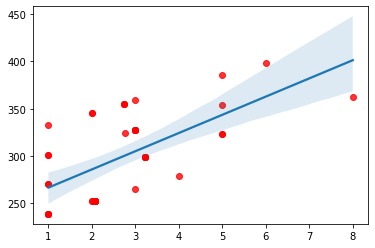

In [20]:
plt.figure(10)
sns.regplot(x=X_test[:,1], y=y_pred, scatter_kws={'color':'red'})#[:,1]

In [21]:
import pickle

In [22]:
pickle.dump(model, open('linear.pkl', 'wb'))

In [23]:
from sklearn.metrics import r2_score

#for acccuracy score
y_pred = model.predict(X_test)

# calculate the R^2 score
score = r2_score(y_test, y_pred)
score

-0.2437526715881564

In [40]:
import statsmodels.api as sm

#for ANOVA
X_tests = sm.add_constant(X_test)
anova_model = sm.OLS(y_test, X_tests)
results = anova_model.fit()

# print the ANOVA table
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.362
Date:                Tue, 21 Mar 2023   Prob (F-statistic):              0.267
Time:                        09:54:18   Log-Likelihood:                -316.40
No. Observations:                  45   AIC:                             638.8
Df Residuals:                      42   BIC:                             644.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        357.9032    109.836      3.259      0.0

Testing the models prediction ability baseon diffent job titles and experience

In [34]:
#job-3, exp-15
test = model.predict(np.array([3,15]).reshape(1,-1))
test[0][0]

486.2975303389776

In [35]:
#job-4, exp-15
test = model.predict(np.array([4,15]).reshape(1,-1))
test[0][0]

517.513099000806

In [36]:
#job-3, exp-25
test = model.predict(np.array([3,25]).reshape(1,-1))
test[0][0]

618.6539011645499